In [31]:
import torch
import torch_geometric as tg
from torch_geometric.data import Data
import networkx as nx
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader

In [5]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

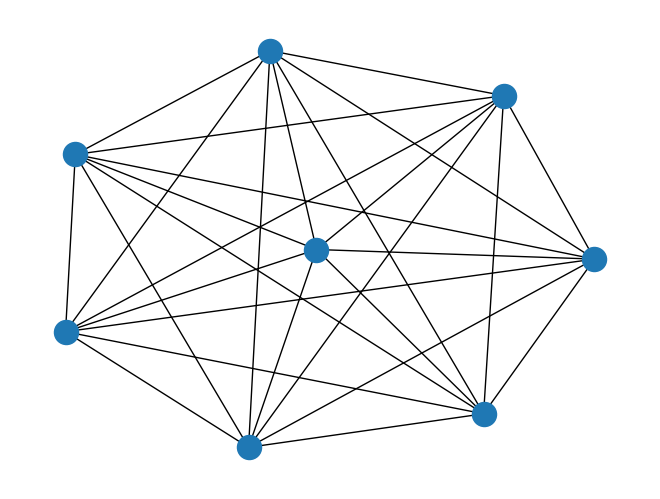

In [22]:
g = tg.utils.to_networkx(data1, to_undirected=True)
nx.draw(g)

In [7]:
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())

Now I want to add graphs with our need for Ng sets for testing

In [17]:
complete_graph_list = []
for i in range(8):
    for j in range(8):
        if i != j:
            complete_graph_list.append([i,j])
edge_index = torch.tensor(complete_graph_list, dtype=torch.long)

In [23]:
y = torch.tensor([
    [2,6], [3,6], [5,6], [4,6]
], dtype=torch.long)
x = torch.tensor([[0, 3, 2], [1, 1, 6], [2, 3, 6], [3, 5, 6], [4, 6, 5], [5, 4, 4], [6, 3, 4], [7, 1, 3]], dtype=torch.float)

data1 = Data(x=x, y=y.t().contiguous(), edge_index=edge_index.t().contiguous())

In [19]:
y = torch.tensor([
    [3,1], [2,1]
], dtype=torch.long)
x = torch.tensor([[0, 4,4], [1, 4,3], [2, 2,5], [3, 2,2], [4, 4,1], [5, 6,6], [6, 7,3], [7, 3,7]], dtype=torch.float)

data2 = Data(x=x, y=y.t().contiguous(), edge_index=edge_index.t().contiguous())

In [20]:
y = torch.tensor([
    [3,7], [5,7]
], dtype=torch.long)
x = torch.tensor([[0, 6,2], [1, 1,3], [2, 3,7], [3, 6,6], [4, 1,7], [5, 7,5], [6, 4,3], [7, 7,5]], dtype=torch.float)

data3 = Data(x=x, y=y.t().contiguous(), edge_index=edge_index.t().contiguous())

In [21]:
y = torch.tensor([
    [1,7], [5,7], [2,3], [6,3]
], dtype=torch.long)
x = torch.tensor([[0, 4,3], [1, 1,1], [2, 6,6], [3, 7,4], [4, 2,5], [5, 3,1], [6, 7,3], [7, 2,2]], dtype=torch.float)

data4 = Data(x=x, y=y.t().contiguous(), edge_index=edge_index.t().contiguous())

In [34]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(loader.num_node_features, 16)
        self.conv2 = GCNConv(16, loader.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [32]:
data_list = [data1, data2, data3, data4]
loader = DataLoader(data_list)

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = loader[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

AttributeError: 'DataLoader' object has no attribute 'num_node_features'